# Analysis of radial wavefunctions

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#!/usr/bin/env ipython

from numpy import *
from matplotlib.pyplot import *

# original version vs EF shifted

In [3]:
# path where wavefunctions are found:
#p0 = 'develop_radial_BdG/compare_no_ef_shift/'
p01 = 'develop_radial_BdG/run_tmat_newsolver/'
p0 = 'develop_radial_BdG/run_tmat_newsolver_shifted_potential/'

## plot source terms

<IPython.core.display.Javascript object>


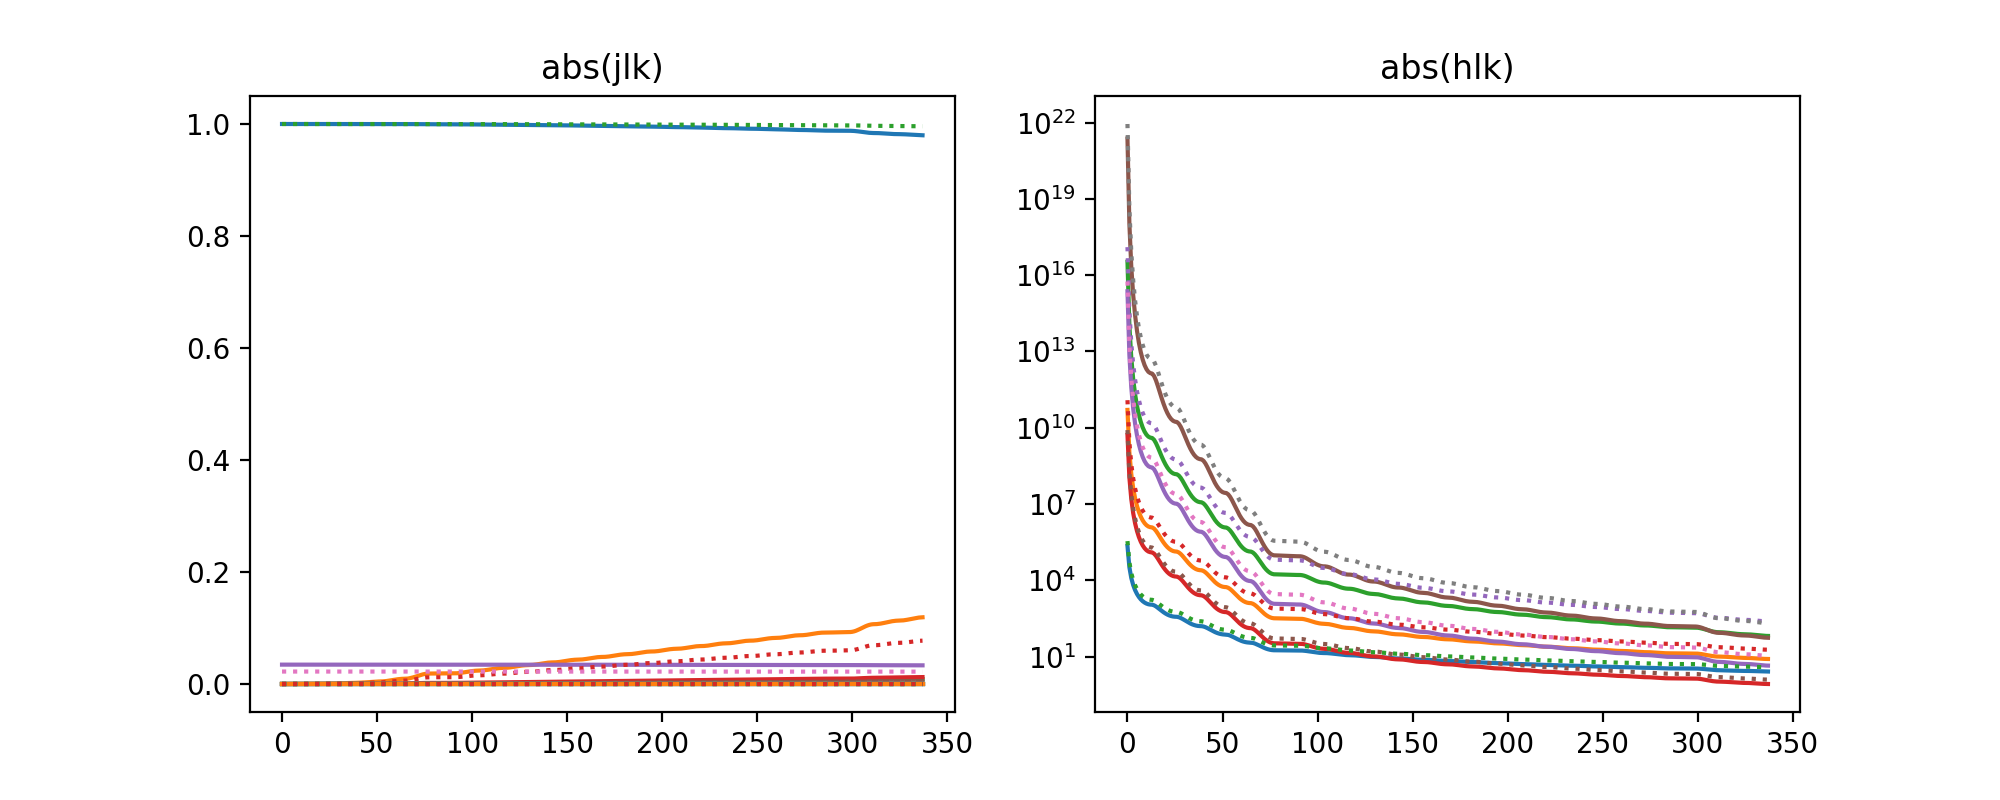

In [4]:
# source terms
dim  = [int(i.split()[0]) for i in array(open(p0+'rll_source_jlk_atom_001_energ_001.dat').readline().split('='))[[1,2]]]

figure(figsize=(10,4))

subplot(1,2,1)
jlk = loadtxt(p0+'rll_source_jlk_atom_001_energ_001.dat')
jlk = (jlk[:,0]+1j*jlk[:,1]).reshape(dim[1], dim[0])
jlk_1 = loadtxt(p01+'rll_source_jlk_atom_001_energ_001.dat')
jlk_1 = (jlk_1[:,0]+1j*jlk_1[:,1]).reshape(dim[1], dim[0])
plot(abs(jlk))
plot(abs(jlk_1), ':')
title('abs(jlk)')

subplot(1,2,2)
hlk = loadtxt(p0+'rll_source_hlk_atom_001_energ_001.dat')
hlk = (hlk[:,0]+1j*hlk[:,1]).reshape(dim[1], dim[0])
plot(abs(hlk))
hlk_1 = loadtxt(p01+'rll_source_hlk_atom_001_energ_001.dat')
hlk_1 = (hlk_1[:,0]+1j*hlk_1[:,1]).reshape(dim[1], dim[0])
plot(abs(hlk_1), ':')
title('abs(hlk)')
gca().set_yscale('log')

Here we see that the source functions are the usual Bessel and Hankel functions

## Plot radial wavefunctions

In [5]:
# rll/sll
dim  = [int(i.split()[0]) for i in array(open(p0+'rll_atom_001_energ_001.dat').readline().split('='))[[1,2,3]]]

rll = loadtxt(p0+'rll_atom_001_energ_001.dat')
sll = loadtxt(p0+'sll_atom_001_energ_001.dat')
rll = (rll[:,0]+1j*rll[:,1]).reshape(dim[2], dim[1], dim[0])
sll = (sll[:,0]+1j*sll[:,1]).reshape(dim[2], dim[1], dim[0])

rll_1 = loadtxt(p01+'rll_atom_001_energ_001.dat')
sll_1 = loadtxt(p01+'sll_atom_001_energ_001.dat')
rll_1 = (rll_1[:,0]+1j*rll_1[:,1]).reshape(dim[2], dim[1], dim[0])
sll_1 = (sll_1[:,0]+1j*sll_1[:,1]).reshape(dim[2], dim[1], dim[0])

<IPython.core.display.Javascript object>


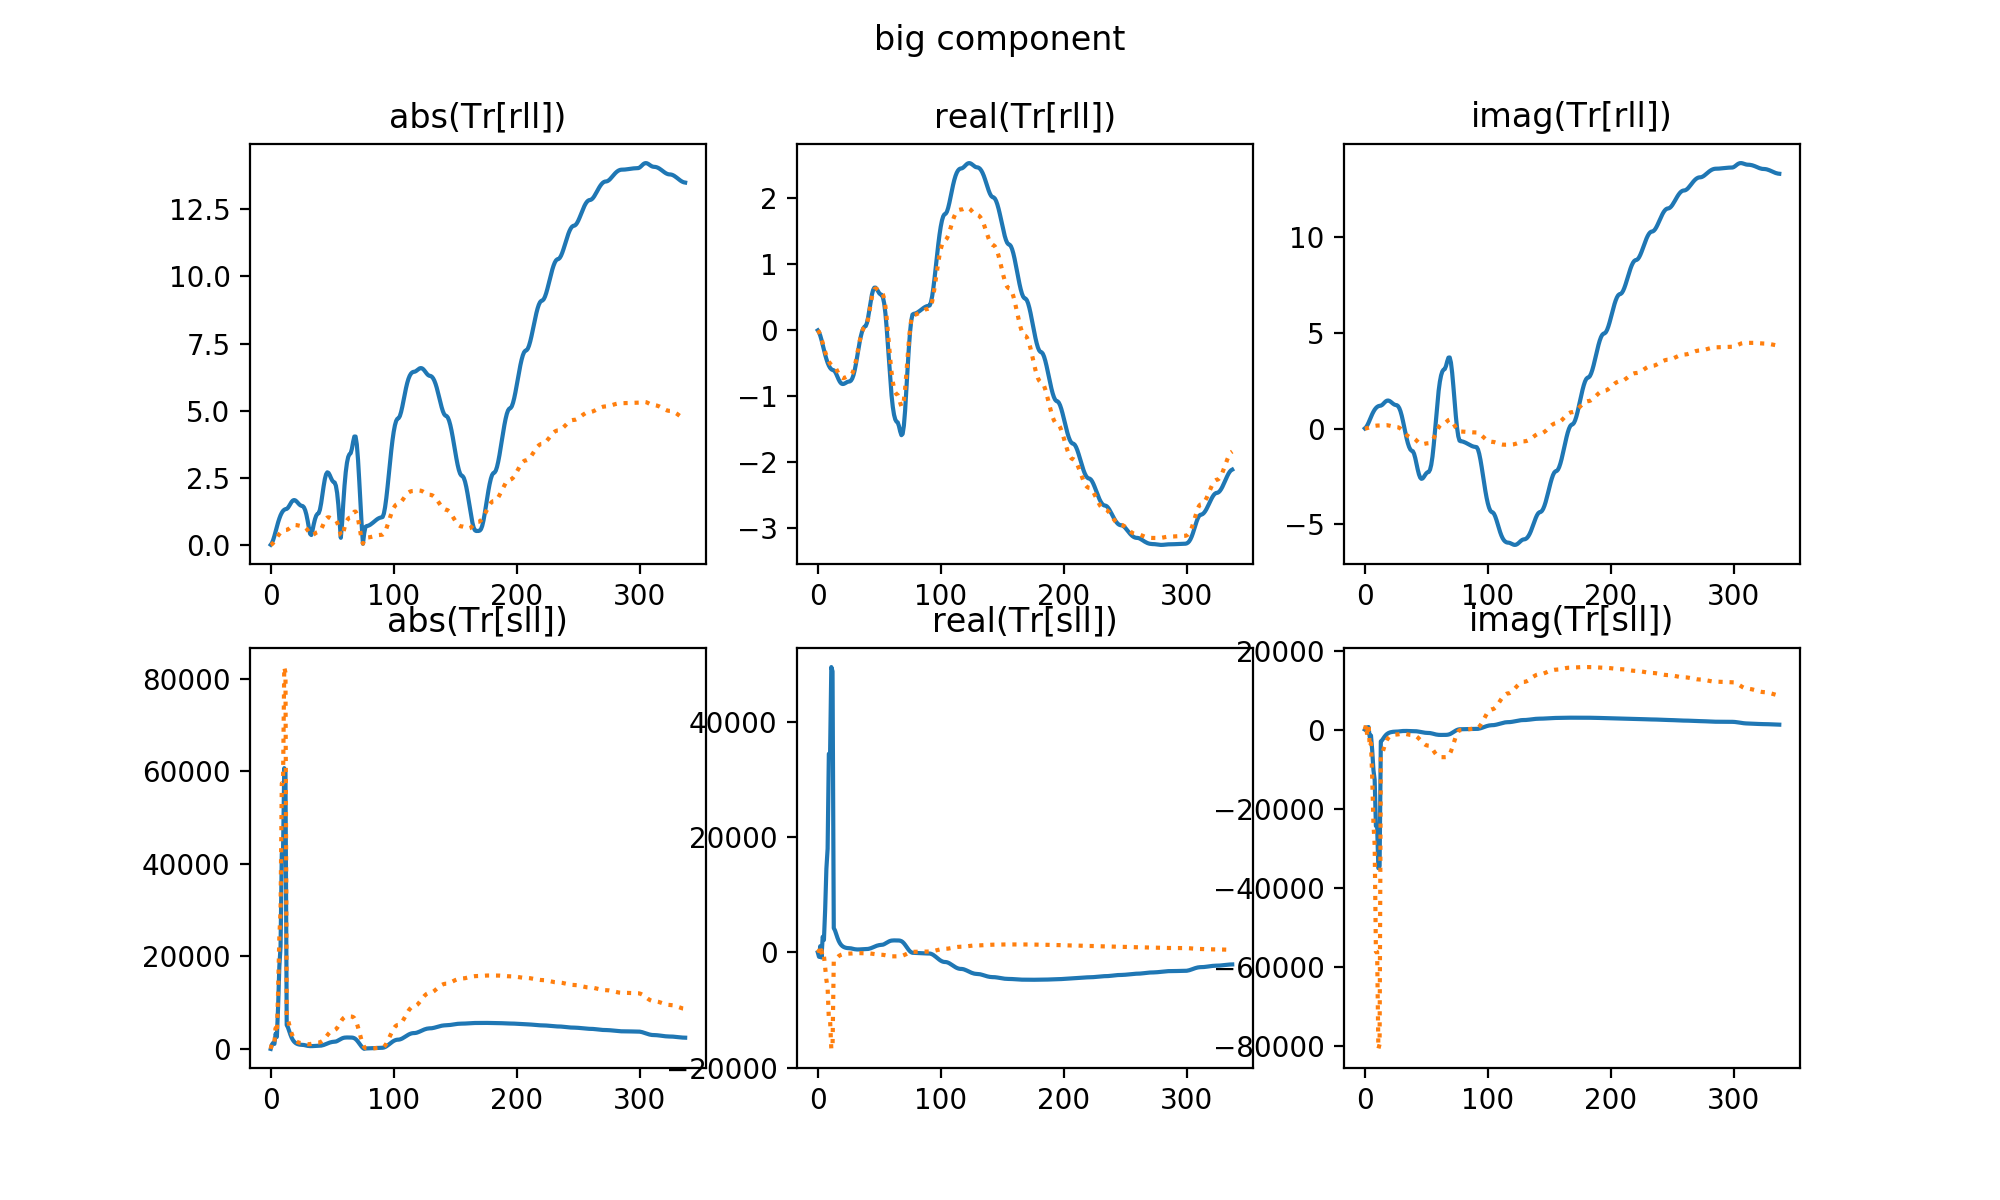

/Users/ruess/sourcecodes/aiida/testenv/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [6]:
# take trace in lm (big component only)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= rll[j,i,i]
  out.append(tmpsum)
rll_tr = array(out)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= sll[j,i,i]
  out.append(tmpsum)
sll_tr = array(out)

figure(figsize=(10,6))
subplot(2,3,1)
plot(abs(rll_tr), '-')
title('abs(Tr[rll])')
subplot(2,3,4)
plot(abs(sll_tr), '-')
title('abs(Tr[sll])')
subplot(2,3,2)
plot(real(rll_tr), '-')
title('real(Tr[rll])')
subplot(2,3,5)
plot(real(sll_tr), '-')
title('real(Tr[sll])')
subplot(2,3,3)
plot(imag(rll_tr), '-')
title('imag(Tr[rll])')
subplot(2,3,6)
plot(imag(sll_tr), '-')
title('imag(Tr[sll])')
suptitle('big component')

# compare to second path:
out = []
for j in range(len(rll_1)):
  tmpsum = 0+1j*0
  for i in range(len(rll_1[0])):
    tmpsum+= rll_1[j,i,i]
  out.append(tmpsum)
rll_tr = array(out)
out = []
for j in range(len(rll_1)):
  tmpsum = 0+1j*0
  for i in range(len(rll_1[0])):
    tmpsum+= sll_1[j,i,i]
  out.append(tmpsum)
sll_tr = array(out)

subplot(2,3,1)
plot(abs(rll_tr), ':')
subplot(2,3,4)
plot(abs(sll_tr), ':')
subplot(2,3,2)
plot(real(rll_tr), ':')
subplot(2,3,5)
plot(real(sll_tr), ':')
subplot(2,3,3)
plot(imag(rll_tr), ':')
subplot(2,3,6)
plot(imag(sll_tr), ':')

In [7]:
"""
# take trace in lm (small component only)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= rll[j,i,i+dim[1]]
  out.append(tmpsum)
rll_tr = array(out)
out = []
for j in range(len(rll)):
  tmpsum = 0+1j*0
  for i in range(len(rll[0])):
    tmpsum+= sll[j,i,i+dim[1]]
  out.append(tmpsum)
sll_tr = array(out)

figure(figsize=(10,6))
subplot(2,3,1)
plot(abs(rll_tr), '-')
title('abs(Tr[rll])')
subplot(2,3,4)
plot(abs(sll_tr), '-')
title('abs(Tr[sll])')
subplot(2,3,2)
plot(real(rll_tr), '-')
title('real(Tr[rll])')
subplot(2,3,5)
plot(real(sll_tr), '-')
title('real(Tr[sll])')
subplot(2,3,3)
plot(imag(rll_tr), '-')
title('imag(Tr[rll])')
subplot(2,3,6)
plot(imag(sll_tr), '-')
title('imag(Tr[sll])')
suptitle('small component')

# compare
out = []
for j in range(len(rll_1)):
  tmpsum = 0+1j*0
  for i in range(len(rll_1[0])):
    tmpsum+= rll_1[j,i,i+dim[1]]
  out.append(tmpsum)
rll_tr = array(out)
out = []
for j in range(len(rll_1)):
  tmpsum = 0+1j*0
  for i in range(len(rll_1[0])):
    tmpsum+= sll_1[j,i,i+dim[1]]
  out.append(tmpsum)
sll_tr = array(out)

subplot(2,3,1)
plot(abs(rll_tr), ':')
subplot(2,3,4)
plot(abs(sll_tr), ':')
subplot(2,3,2)
plot(real(rll_tr), ':')
subplot(2,3,5)
plot(real(sll_tr), ':')
subplot(2,3,3)
plot(imag(rll_tr), ':')
subplot(2,3,6)
plot(imag(sll_tr), ':')
"""

"\n# take trace in lm (small component only)\nout = []\nfor j in range(len(rll)):\n  tmpsum = 0+1j*0\n  for i in range(len(rll[0])):\n    tmpsum+= rll[j,i,i+dim[1]]\n  out.append(tmpsum)\nrll_tr = array(out)\nout = []\nfor j in range(len(rll)):\n  tmpsum = 0+1j*0\n  for i in range(len(rll[0])):\n    tmpsum+= sll[j,i,i+dim[1]]\n  out.append(tmpsum)\nsll_tr = array(out)\n\nfigure(figsize=(10,6))\nsubplot(2,3,1)\nplot(abs(rll_tr), '-')\ntitle('abs(Tr[rll])')\nsubplot(2,3,4)\nplot(abs(sll_tr), '-')\ntitle('abs(Tr[sll])')\nsubplot(2,3,2)\nplot(real(rll_tr), '-')\ntitle('real(Tr[rll])')\nsubplot(2,3,5)\nplot(real(sll_tr), '-')\ntitle('real(Tr[sll])')\nsubplot(2,3,3)\nplot(imag(rll_tr), '-')\ntitle('imag(Tr[rll])')\nsubplot(2,3,6)\nplot(imag(sll_tr), '-')\ntitle('imag(Tr[sll])')\nsuptitle('small component')\n\n# compare\nout = []\nfor j in range(len(rll_1)):\n  tmpsum = 0+1j*0\n  for i in range(len(rll_1[0])):\n    tmpsum+= rll_1[j,i,i+dim[1]]\n  out.append(tmpsum)\nrll_tr = array(out)\nout =

In [8]:
"""
# some l-diagonal blocks
out = []
for j in range(len(rll)):
  for i in range(len(rll[0])):
    out.append(rll[j,i,i])
rll_ii = array(out).reshape(len(rll), len(rll[0]))
out = []
for j in range(len(rll)):
  for i in range(len(rll[0])):
    out.append(sll[j,i,i])
sll_ii = array(out).reshape(len(rll), len(rll[0]))

figure(figsize=(10,3))
subplot(1,3,1)
for i in range(9):
   plot(abs(rll_ii[:,i]), label=str(i)+', rll')
   plot(abs(sll_ii[:,i]), '--', label=str(i)+', sll')
legend(fontsize='x-small')
title('abs(rll[i,i])')

subplot(1,3,2)
for i in range(9):
   plot(real(rll_ii[:,i]), label=str(i)+', rll')
   plot(real(sll_ii[:,i]), '--', label=str(i)+', sll')
legend(fontsize='x-small')
title('real(rll[i,i])')

subplot(1,3,3)
for i in range(9):
   plot(imag(rll_ii[:,i]), label=str(i)+', rll')
   plot(imag(sll_ii[:,i]), '--', label=str(i)+', sll')
legend(fontsize='x-small')
title('imag(rll[i,i])')
"""

"\n# some l-diagonal blocks\nout = []\nfor j in range(len(rll)):\n  for i in range(len(rll[0])):\n    out.append(rll[j,i,i])\nrll_ii = array(out).reshape(len(rll), len(rll[0]))\nout = []\nfor j in range(len(rll)):\n  for i in range(len(rll[0])):\n    out.append(sll[j,i,i])\nsll_ii = array(out).reshape(len(rll), len(rll[0]))\n\nfigure(figsize=(10,3))\nsubplot(1,3,1)\nfor i in range(9):\n   plot(abs(rll_ii[:,i]), label=str(i)+', rll')\n   plot(abs(sll_ii[:,i]), '--', label=str(i)+', sll')\nlegend(fontsize='x-small')\ntitle('abs(rll[i,i])')\n\nsubplot(1,3,2)\nfor i in range(9):\n   plot(real(rll_ii[:,i]), label=str(i)+', rll')\n   plot(real(sll_ii[:,i]), '--', label=str(i)+', sll')\nlegend(fontsize='x-small')\ntitle('real(rll[i,i])')\n\nsubplot(1,3,3)\nfor i in range(9):\n   plot(imag(rll_ii[:,i]), label=str(i)+', rll')\n   plot(imag(sll_ii[:,i]), '--', label=str(i)+', sll')\nlegend(fontsize='x-small')\ntitle('imag(rll[i,i])')\n"

In [9]:
"""
# sum over radial dimension:
rll_int = (sum(abs(rll), axis=0))
sll_int = (sum(abs(sll), axis=0))

figure(figsize=(10,4))

subplot(2,2,1)
imshow(rll_int)
title("Int{rll(r)_L,L'} dr")
colorbar()
subplot(2,2,2)
imshow(sll_int)
title("Int{sll(r)_L,L'} dr")
colorbar()

rll_int = log(sum(abs(rll), axis=0))
sll_int = log(sum(abs(sll), axis=0))
subplot(2,2,3)
imshow(rll_int)
title("log(Int{rll(r)_L,L'} dr)")
colorbar()
subplot(2,2,4)
imshow(sll_int)
title("log(Int{sll(r)_L,L'} dr)")
colorbar()
"""

'\n# sum over radial dimension:\nrll_int = (sum(abs(rll), axis=0))\nsll_int = (sum(abs(sll), axis=0))\n\nfigure(figsize=(10,4))\n\nsubplot(2,2,1)\nimshow(rll_int)\ntitle("Int{rll(r)_L,L\'} dr")\ncolorbar()\nsubplot(2,2,2)\nimshow(sll_int)\ntitle("Int{sll(r)_L,L\'} dr")\ncolorbar()\n\nrll_int = log(sum(abs(rll), axis=0))\nsll_int = log(sum(abs(sll), axis=0))\nsubplot(2,2,3)\nimshow(rll_int)\ntitle("log(Int{rll(r)_L,L\'} dr)")\ncolorbar()\nsubplot(2,2,4)\nimshow(sll_int)\ntitle("log(Int{sll(r)_L,L\'} dr)")\ncolorbar()\n'

matrix structure of wavefunctions